Bank Customer Churn Analysis Project

In [110]:
# Part 1: Data Loading and Basic Python Operation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

#Importing credit card csv file
Customer_data=pd.read_csv('C:/Users/Hp/Documents/IDATA/Python/Churn_Modelling.csv')
#Display the first 5 rows
Customer_data.head

#data.describe()
#df=pd.DataFrame(data)

<bound method NDFrame.head of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfPro

 Part 1: Basic Python Operations

In [38]:
#Calculate the average balance for different age groups
def calculate_age_group_balance(Customer_data):
# Create age groups using conditional statements
 Customer_data['age_group'] = None
 for idx in Customer_data.index:
    age = Customer_data.loc[idx, 'Age']
    if age < 30:
       Customer_data.loc[idx, 'age_group'] = 'Young'
       
    elif age < 50:
       Customer_data.loc[idx, 'age_group'] = 'Middle-aged'
 else:
  Customer_data.loc[idx, 'age_group'] = 'Senior'
 # Calculate average balance per age group
 return Customer_data.groupby('age_group')['Balance'].mean()

# Display the result
print(calculate_age_group_balance(Customer_data))


age_group
Middle-aged     76352.768688
Senior         130142.790000
Young           73664.301518
Name: Balance, dtype: float64


In [ ]:
# Create an empty dictionary to store the count of customers by country
country_counts = {}

# Loop through each row in the DataFrame
for country in Customer_data['Geography']:
    # If the country is already in the dictionary, increment the count
    if country in country_counts:
        country_counts[country] += 1
    else:
        # If the country is not in the dictionary, add it with a count of 1
        country_counts[country] = 1

# Display the result
print(country_counts)

{'France': 5014, 'Spain': 2477, 'Germany': 2509}


 Part 2: Data Structure Manipulation

In [34]:
#create lists of churned and retained customers
# Create a list of churned customers (Exited == 1)
churned_customers = Customer_data[Customer_data['Exited'] == 1]

# Create a list of retained customers (Exited == 0)
retained_customers = Customer_data[Customer_data['Exited'] == 0]

# Filter high-value customers (balance > 100,000)

high_value_customers = [
 customer_id for customer_id, balance
 in zip(Customer_data['CustomerId'], Customer_data['Balance'])
 if balance > 100000
 ]

# Display the result
print('Customers with balalnce greater than 100k:',high_value_customers)


Customers with balalnce greater than 100k: [15619304, 15737888, 15574012, 15656148, 15792365, 15592389, 15767821, 15643966, 15737452, 15736816, 15728693, 15750181, 15794171, 15788448, 15738148, 15687946, 15755196, 15684171, 15754849, 15602280, 15771573, 15766205, 15771873, 15616550, 15768193, 15702298, 15760861, 15630053, 15651280, 15773469, 15592461, 15789484, 15696061, 15641582, 15638424, 15703793, 15812518, 15779052, 15780961, 15803136, 15762418, 15731511, 15699461, 15738721, 15613854, 15602312, 15665790, 15715951, 15591100, 15609618, 15675522, 15705512, 15661670, 15600781, 15682472, 15580203, 15760085, 15627360, 15782688, 15591607, 15718369, 15677871, 15712543, 15584518, 15610156, 15594408, 15640905, 15698932, 15628145, 15800703, 15705707, 15754105, 15703264, 15689044, 15804017, 15692132, 15630910, 15658929, 15585388, 15724623, 15588537, 15587562, 15651022, 15586310, 15755209, 15790355, 15762615, 15625426, 15716334, 15621075, 15587421, 15594815, 15777892, 15604482, 15622911, 157278

 Part 3:Data Cleaning and Preparation

In [47]:
#Check for missing values and handle them appropriately
def prepare_data(Customer_data):
 # Handle missing values
 Customer_data['Balance'].fillna(Customer_data['Balance'].mean(), inplace=True)
 # Create new features
 Customer_data['balance_per_product'] = Customer_data['Balance'] / Customer_data['NumOfProducts']
 Customer_data['is_high_value'] = Customer_data['Balance'] > Customer_data['Balance'].mean()
 # Convert categorical variables
 Customer_data = pd.get_dummies(Customer_data, columns=['Gender', 'Geography'])
 return Customer_data

#Display result
print(prepare_data(Customer_data))

      RowNumber  CustomerId    Surname  CreditScore  Age  Tenure    Balance  \
0             1    15634602   Hargrave          619   42       2       0.00   
1             2    15647311       Hill          608   41       1   83807.86   
2             3    15619304       Onio          502   42       8  159660.80   
3             4    15701354       Boni          699   39       1       0.00   
4             5    15737888   Mitchell          850   43       2  125510.82   
...         ...         ...        ...          ...  ...     ...        ...   
9995       9996    15606229   Obijiaku          771   39       5       0.00   
9996       9997    15569892  Johnstone          516   35      10   57369.61   
9997       9998    15584532        Liu          709   36       7       0.00   
9998       9999    15682355  Sabbatini          772   42       3   75075.31   
9999      10000    15628319     Walker          792   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  Est

C:\Users\Hp\AppData\Local\Temp\ipykernel_20684\2601948801.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Customer_data['Balance'].fillna(Customer_data['Balance'].mean(), inplace=True)


 Part 4:Exploratory Data Analysis and Visualization

Figure(1500x1200)


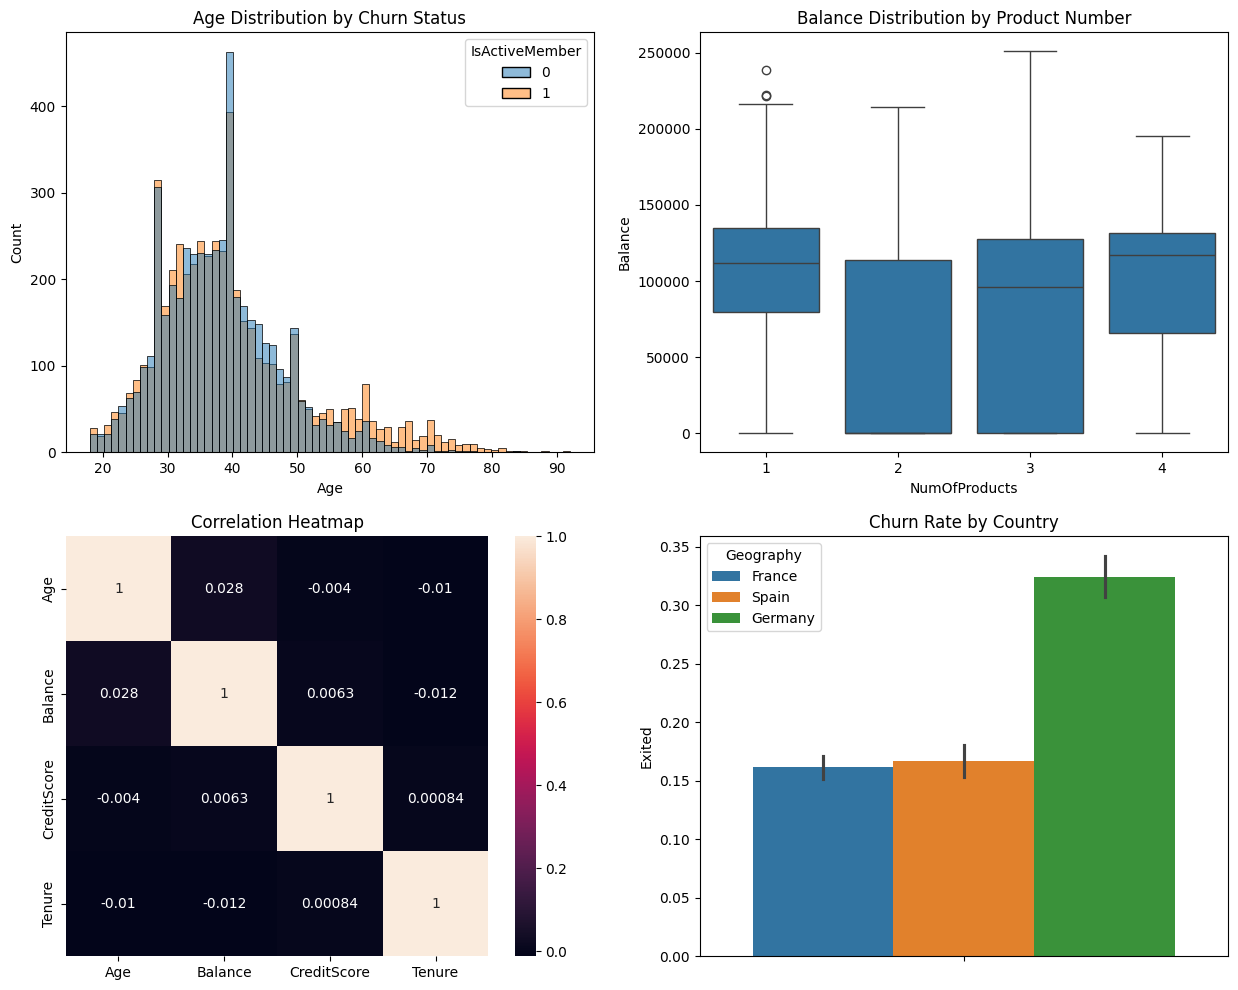

In [124]:
# Define the bins (ranges) for CreditScore
bins = [300, 579, 669, 739, 850]

# Define the labels for each bin
labels = ['Poor', 'Fair', 'Good', 'Excellent']

# Create a new column 'CreditScoreRange' based on the bins
Customer_data['CreditScoreRange'] = pd.cut(Customer_data['CreditScore'], bins=bins, labels=labels, right=True)

def create_visualizations(Customer_data):
 # Set up the matplotlib figure
 Customer_data['CreditScore']
 fig, axes = plt.subplots(2, 2, figsize=(15, 12))
 # Age distribution
 sns.histplot(data=Customer_data, x='Age', hue='IsActiveMember', ax=axes[0,0])
 axes[0,0].set_title('Age Distribution by Churn Status')
 # Balance by product number
 sns.boxplot(data=Customer_data, x='NumOfProducts', y='Balance',
 ax=axes[0,1])
 axes[0,1].set_title('Balance Distribution by Product Number')
 # Correlation heatmap
 numeric_cols = ['Age', 'Balance', 'CreditScore', 'Tenure']
 sns.heatmap(Customer_data[numeric_cols].corr(), annot=True, ax=axes[1,0])
 axes[1,0].set_title('Correlation Heatmap')
 
 # Churn rate by Country
 sns.barplot(data=Customer_data, hue='Geography', y='Exited',
 ax=axes[1,1])
 axes[1,1].set_title('Churn Rate by Country')
 ##plt.tight_layout()
 
 # Churn rate by credit score range

 #sns.barplot(data=Customer_data, x='CreditScoreRange', y='Exited',
 #ax=axes[1,1])
 #axes[1,1].set_title('Churn Rate by Credit Score Range')
 #plt.tight_layout()

 return fig

#Display result
print(create_visualizations(Customer_data))

 Part 5: Basic Predictive Analysis

In [74]:
#Prepare features for modeling

# Handling Missing Values

# Check for missing values
print(Customer_data.isnull().sum())

# Option 1: Drop rows with missing values
Customer_data.dropna(inplace=True)

# Option 2: Impute missing values
Customer_data['Balance'].fillna(Customer_data['Balance'].median(), inplace=True)  # Impute with median for Balance
Customer_data['Age'].fillna(Customer_data['Age'].mean(), inplace=True)  # Impute with mean for Age


RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
CreditScoreRange     0
Gender_Male          0
Geography_Germany    0
Geography_Spain      0
dtype: int64


C:\Users\Hp\AppData\Local\Temp\ipykernel_20684\2530951702.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Customer_data['Balance'].fillna(Customer_data['Balance'].median(), inplace=True)  # Impute with median for Balance
C:\Users\Hp\AppData\Local\Temp\ipykernel_20684\2530951702.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on 

In [83]:
# Scaling/Normalizing Numerical Features
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# List of numerical features to scale
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure']

# Standardize the numerical features
Customer_data[numerical_features] = scaler.fit_transform(Customer_data[numerical_features])

# Check the scaled data
print(Customer_data[numerical_features].head())


   CreditScore       Age   Balance  EstimatedSalary    Tenure
0    -0.326221  0.293517 -1.225848         0.021886 -1.041760
1    -0.440036  0.198164  0.117350         0.216534 -1.387538
2    -1.536794  0.293517  1.333053         0.240687  1.032908
3     0.501521  0.007457 -1.225848        -0.108918 -1.387538
4     2.063884  0.388871  0.785728        -0.365276 -1.041760


In [101]:
#Feature Engineering

# Create balance per product feature
Customer_data['balance_per_product'] = Customer_data['Balance'] / Customer_data['NumOfProducts']

# Interaction feature: Age * Tenure (if you believe these interact)
Customer_data['age_tenure_interaction'] = Customer_data['Age'] * Customer_data['Tenure']

# Binary feature for customers with a credit card
Customer_data['HasCreditCard'] = Customer_data['HasCrCard'].apply(lambda x: 1 if x == 1 else 0)


In [100]:
#Splitting the Data into Training and Test Sets

from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)  # Check the size of the splits


(8000, 5) (2000, 5)


 Create a simple prediction mode
 

In [125]:
#Part 5: Basic Predictive Analysis

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
# Prepare features for modeling
def prepare_features(Customer_data):
    # Selecting relevant features
    features = Customer_data[['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember']]
    target = Customer_data['Exited']
    
    return features, target

# Split data into training and testing sets
def split_data(features, target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Create a simple prediction model
def create_model(X_train, y_train):
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Logistic Regression Model
    model = LogisticRegression()
    model.fit(X_train_scaled, y_train)
    
    return model, scaler

# Evaluate the model
def evaluate_model(model, X_test, y_test, scaler):
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Main workflow
features, target = prepare_features(Customer_data)
X_train, X_test, y_train, y_test = split_data(features, target)
model, scaler = create_model(X_train, y_train)
evaluate_model(model, X_test, y_test, scaler)

Confusion Matrix:
[[1561   46]
 [ 333   60]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1607
           1       0.57      0.15      0.24       393

    accuracy                           0.81      2000
   macro avg       0.70      0.56      0.57      2000
weighted avg       0.77      0.81      0.76      2000



Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1607
           1       0.57      0.15      0.24       393

    accuracy                           0.81      2000
   macro avg       0.70      0.56      0.57      2000
weighted avg       0.77      0.81      0.76      2000

Confusion Matrix:
 [[1561   46]
 [ 333   60]]
Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1607
           1       0.66      0.44      0.53       393

    accuracy                           0.85      2000
   macro avg       0.77      0.69      0.72      2000
weighted avg       0.83      0.85      0.83      2000

Confusion Matrix:
 [[1518   89]
 [ 220  173]]


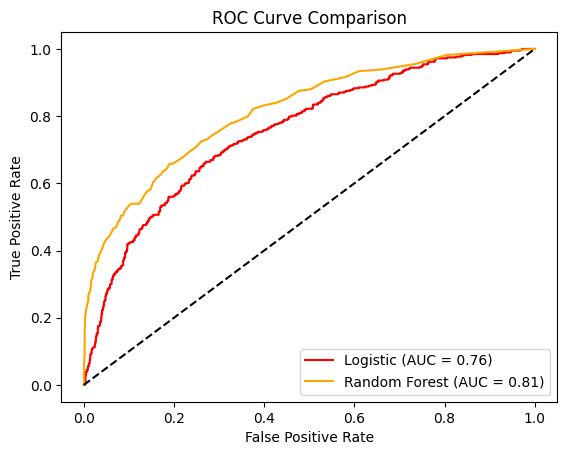

In [ ]:
#-------------------------------------Model Building and Training
#Splitting data into features (X) and target (y)
#X = data.drop('Exited', axis=1)
#y = data['Exited']

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(X_test)
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)


# Model Evaluation
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


# Model 2: Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)


# Model Evaluation
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


# Logistic Regression ROC Curve
y_pred_proba_log = log_reg.predict_proba(X_test_scaled)[:,1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log)
roc_auc_log = roc_auc_score(y_test, y_pred_proba_log)


# Random Forest ROC Curve
y_pred_proba_rf = rf_clf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)



# Plotting ROC Curves
plot.plot(fpr_log, tpr_log, label=f"Logistic (AUC = {roc_auc_log:.2f})", color="red")
plot.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color="orange")
plot.plot([0, 1], [0, 1], 'k--')  # Black dashed line for reference
plot.title('ROC Curve Comparison')
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.legend()
plot.show()